In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf

tf.__version__

'2.4.0'

In [3]:
print('GPU Information -', tf.test.gpu_device_name(), '\n')

!nvidia-smi

GPU Information - /device:GPU:0 

Fri Aug  6 17:04:01 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 471.41       Driver Version: 471.41       CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
| 32%   45C    P2    41W / 125W |    762MiB /  6144MiB |     22%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                      

## 이미지 불러오기
- 이미지 데이터 생성

In [4]:
train_dir = 'datasets/dogs_and_cats_small/train'
test_dir = 'datasets/dogs_and_cats_small/test'
valid_dir = 'datasets/dogs_and_cats_small/validation'

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
                train_dir,
                target_size=(150, 150),
                batch_size = 20,
                class_mode = 'binary')

valid_generator = valid_datagen.flow_from_directory(
                valid_dir,
                target_size=(150, 150),
                batch_size = 20,
                class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기 :', data_batch.shape)
    print('배치 레이블 크기 :', labels_batch.shape)
    break

배치 데이터 크기 : (20, 150, 150, 3)
배치 레이블 크기 : (20,)


## CNN Modeling

### Model Define

In [7]:
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

### Model Compile

In [9]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

### Model Fit

In [10]:
%%time

Hist_dandc = model.fit(train_generator,
                      steps_per_epoch=100,
                      epochs=60,
                      validation_data=valid_generator,
                      validation_steps=50)

Epoch 1/60
100/100 [==============================] - 20s 137ms/step - loss: 0.6912 - accuracy: 0.5362 - val_loss: 0.6888 - val_accuracy: 0.5170
Epoch 2/60
100/100 [==============================] - 3s 35ms/step - loss: 0.6617 - accuracy: 0.5896 - val_loss: 0.6185 - val_accuracy: 0.6510
Epoch 3/60
100/100 [==============================] - 3s 34ms/step - loss: 0.6104 - accuracy: 0.6639 - val_loss: 0.6090 - val_accuracy: 0.6650
Epoch 4/60
100/100 [==============================] - 4s 35ms/step - loss: 0.5553 - accuracy: 0.7188 - val_loss: 0.6144 - val_accuracy: 0.6620
Epoch 5/60
100/100 [==============================] - 4s 36ms/step - loss: 0.4898 - accuracy: 0.7531 - val_loss: 0.5869 - val_accuracy: 0.7200
Epoch 6/60
100/100 [==============================] - 4s 36ms/step - loss: 0.4923 - accuracy: 0.7562 - val_loss: 0.5431 - val_accuracy: 0.7140
Epoch 7/60
100/100 [==============================] - 4s 39ms/step - loss: 0.4185 - accuracy: 0.8145 - val_loss: 0.5220 - val_accuracy: 0.74

### Visualization

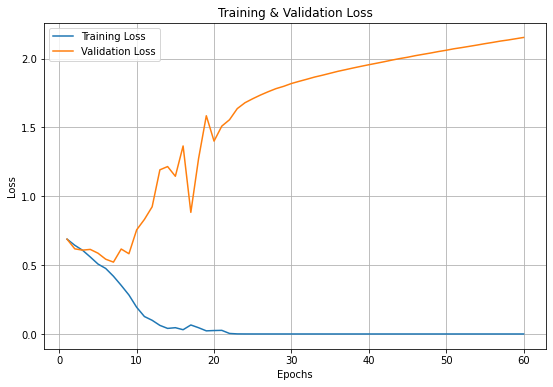

In [12]:
import matplotlib.pyplot as plt
epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_dandc.history['loss'])
plt.plot(epochs, Hist_dandc.history['val_loss'])

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

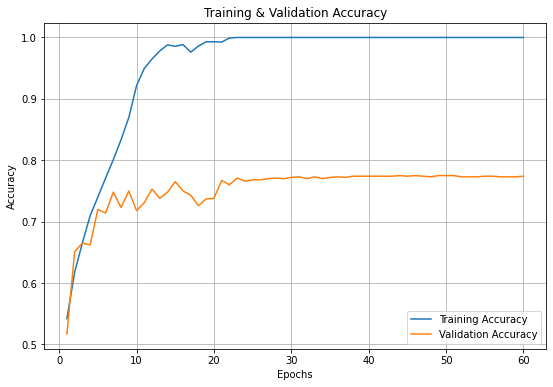

In [13]:
epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_dandc.history['accuracy'])
plt.plot(epochs, Hist_dandc.history['val_accuracy'])

plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()

### Model Evaluate

In [14]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(
                  test_dir,
                  target_size = (150, 150),
                  batch_size = 20,
                  class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [15]:
loss, accuracy = model.evaluate(test_generator,
                                steps = 50)
print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

50/50 [==============================] - 8s 153ms/step - loss: 2.5707 - accuracy: 0.7440
Loss = 2.57071
Accuracy = 0.74400


### Model Save

In [18]:
model.save('./models/002_dogs_and_cats_small.h5')

In [19]:
from tensorflow.keras.models import load_model

model_small = load_model('./models/002_dogs_and_cats_small.h5')

In [20]:
loss, accuracy = model_small.evaluate(test_generator,
                                    steps = 50)
print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

50/50 [==============================] - 4s 72ms/step - loss: 2.5707 - accuracy: 0.7440
Loss = 2.57071
Accuracy = 0.74400
